In [13]:
import torch
from helper import load_fashion_mnist_data, predict_fashion_mnist
from helper import evaluate_accuracy, evaluate_loss
from torch.utils.data import DataLoader
from Softmax import SoftmaxNet

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Input size: 28 (width) * 28 (height) = 784 pixels
num_inputs = 784

# Output size: 10 categories
num_outputs = 10

batch_size = 256
mnist_train, mnist_test = load_fashion_mnist_data(batch_size, resize=None)

In [15]:
smNet = SoftmaxNet(num_inputs, num_outputs, verbose=True)
smNet.initialized(learning_rate=0.15)
smNet.train(mnist_train, 5)

[epoch 1, batch 46] loss: 1.1146213438199915
[epoch 1, batch 92] loss: 0.7834585620009381
[epoch 1, batch 138] loss: 0.6794189007385917
[epoch 1, batch 184] loss: 0.6315160924973695
[epoch 1, batch 230] loss: 0.5964921162180279
[epoch 2, batch 46] loss: 0.641908352141795
[epoch 2, batch 92] loss: 0.5630881617898527
[epoch 2, batch 138] loss: 0.5556075274944305
[epoch 2, batch 184] loss: 0.5438925656287567
[epoch 2, batch 230] loss: 0.5160900432130565
[epoch 3, batch 46] loss: 0.5707240908042245
[epoch 3, batch 92] loss: 0.5120050395312516
[epoch 3, batch 138] loss: 0.5166704525118289
[epoch 3, batch 184] loss: 0.5029915085305339
[epoch 3, batch 230] loss: 0.5002167950505796
[epoch 4, batch 46] loss: 0.5469808727502823
[epoch 4, batch 92] loss: 0.4810025717901147
[epoch 4, batch 138] loss: 0.4860380920379058
[epoch 4, batch 184] loss: 0.48581836210644763
[epoch 4, batch 230] loss: 0.48201708430829254
[epoch 5, batch 46] loss: 0.5192690886881041
[epoch 5, batch 92] loss: 0.48184141905411

SoftmaxNet(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

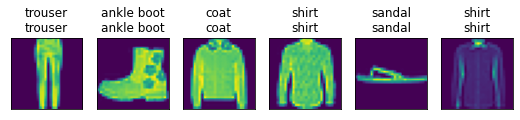

In [16]:
predict_fashion_mnist(smNet, mnist_test)

In [21]:
training_loss = evaluate_loss(smNet, mnist_train)
validation_loss = evaluate_loss(smNet, mnist_test)

print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Training Loss (60000 samples): 
0.46955782483418784
Validation Loss (10000 samples): 
0.5030181341171265


In [22]:
training_accuracy = evaluate_accuracy(smNet, mnist_train)
validation_accuracy = evaluate_accuracy(smNet, mnist_test)

print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Training accuracy (60000 samples): 
0.8393166666666667
Validation accuracy (10000 samples): 
0.827
